In [1]:
import numpy as np
import time
from matplotlib import pylab as plt
import instrument_controller
from scipy.io import savemat
import ando_aq6317b # OSA
from wsapi import * # Waveshaper

## OSA connection and settings

In [2]:
logFile = 'logfile.log'
myLab = instrument_controller.InstrumentManager(log_file_name=logFile)

In [3]:
## OSA
myLab.add_instrument_alias('OSA', 'GPIB3::22::INSTR')
myOSA = ando_aq6317b.AndoOSA(myLab, alias='OSA')

In [93]:
## OSA Settings
myOSA.set_resolution_wl(0.1)
myOSA.set_sampling_pts(1000)
myOSA.set_levelscale_dBm(10)
myOSA.set_level_dBm(-30)
myOSA.set_sensitivity('norm auto')

wl = myOSA.set_centerwavelength(1549.5)
span = myOSA.set_span_wl(15)

myOSA.RepeatSweep()


## Optical Spectrum measurements

In [1]:
## Measurement 
myOSA.SingleSweep()
osa_trace = myOSA.get_trace()
savemat('OSA_spectrumComb1.mat', {'wl':osa_trace[0],'power':osa_trace[1]})


NameError: name 'myOSA' is not defined

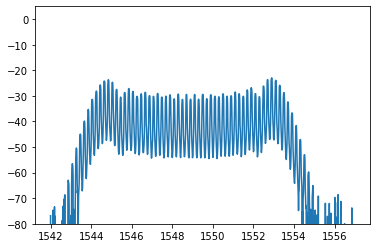

In [10]:
## Plot the measurement
plt.figure()
plt.plot(osa_trace[0],osa_trace[1])
plt.ylim([-80,5])
plt.show()


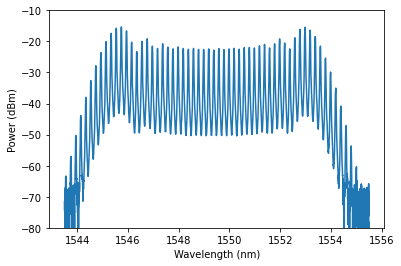

In [59]:
plt.figure()
plt.plot(osa_trace[0],osa_trace[1])
plt.ylim([-80,-10])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (dBm)')
plt.show()
##Bias 10,4

In [295]:
myOSA.SingleSweep()  # 
#myOSA.RepeatSweep()


## Waveshaper control (Compression)

1549.5
ws_create_waveshaper rc=  b'success'
ws_create_waveshaper rc=  b'success'
ws_delete_waveshaper rc= b'success'


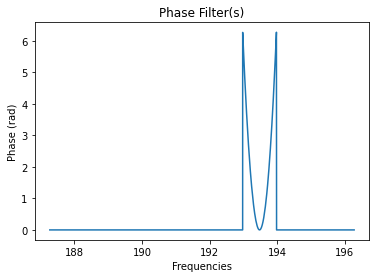

In [25]:
# Parameters 
Port_num = 1        #For Models with more than one output port 
c = 299792458
w0 = [1549.5]       # in nm
BW_filter = 8    # in nm
Attenuation = 0   # in dB 
Dispersion = 1    # in ps/nm
filter_name = 'Group 2/Dispersion_1psnn_bw8nm.wsp'

f0 = np.zeros(len(w0)) # Create an array with the number of filters to be created
# To frequency
for x in range(len(w0)):
    print (w0[x])
    f0[x] = (c/(w0[x]*1E-9))/1E12       #in THz
    
BW_f = (c*(BW_filter*1E-9)/((w0[0]*1E-9)**2)/1E12)    #in THz, we assume all filters have the same BW


# Create the WSP vector data 
Freq = np.arange(187.275,196.275,0.001) # check in page 83 of the manual the frequencies range
Attn = np.full(np.size(Freq),50) 
Phase = np.zeros(np.size(Freq))
Port = np.ones(np.size(Freq))*Port_num

# Create the filter with desired parameters 
Dlambda = np.zeros(len(w0))
for x in range(len(w0)):
    start = int(np.around((f0[x]-BW_f/2-187.2750)*1000)+1)   #Indexing the start & stop frequencies, C+L Band freqs 
    stop = int(np.around((f0[x]+BW_f/2-187.2750)*1000)+1)
    # For Attenuation 
    Attn[start:stop] = Attenuation 
    # For Phase 
    beta2 = -Dispersion*w0[x]**2/(2*np.pi*c*1E-3)
    Delays = 0
    Phase[start:stop] = -beta2/2*(2*np.pi*(Freq[start:stop]-f0[x]))**2
    

#Create the WSP file 

WSPfile = open(filter_name,'w')
for x in range (np.size(Freq)):
    WSPfile.write("%0.3f\t%0.3f\t%0.3f\t%0.3f\n" %(Freq[x],Attn[x],Phase[x],Port[x]))
WSPfile.close()

# Read the profile from WSP file
WSPfile = open(filter_name,'r')
profiletext = WSPfile.read()
WSPfile.close()

# Plotting the filter created 

data_wsp = np.loadtxt(filter_name)
plt.figure()
plt.plot(data_wsp[:,0],data_wsp[:,2])
plt.xlabel('Frequencies')
plt.ylabel('Phase (rad)')
plt.title('Phase Filter(s)')

# Create the waveshaper instance 
rc = ws_create_waveshaper("ws1","SN067742.wsconfig")
print ("ws_create_waveshaper rc= ",ws_get_result_description(rc))

time.sleep(1)
# Read the WSP file and load it to the Waveshaper
#The Output should state 'Success', otherwise there is no communication with the WS
rc = ws_load_profile("ws1",profiletext)
print ("ws_create_waveshaper rc= ",ws_get_result_description(rc))
time.sleep(1)

#delete the waveshaper instance
rc = ws_delete_waveshaper("ws1")
print ("ws_delete_waveshaper rc=",ws_get_result_description(rc))


## PSA 

In [186]:
## OSA Settings
myOSA.set_resolution_wl(0.05)
myOSA.set_sampling_pts(5000)
myOSA.set_sensitivity('mid')
myOSA.set_levelscale_dBm(10)
myOSA.set_level_dBm(-20)
wl = myOSA.set_centerwavelength(1548.5)
span = myOSA.set_span_wl(4)

myOSA.RepeatSweep()

In [187]:
## Measurement 
myOSA.SingleSweep()
osa_trace = myOSA.get_trace()
savemat('Filtered_Spectrum_signal_attn_amplified_1p6rad_Phase.mat', {'wl':osa_trace[0],'power':osa_trace[1]})

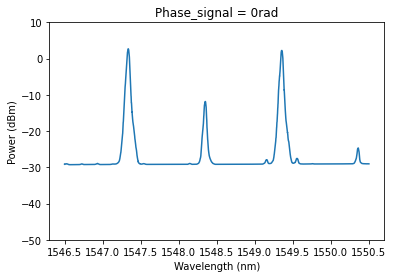

In [188]:
plt.figure()
plt.plot(osa_trace[0],osa_trace[1])
plt.ylim([-50,10])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (dBm)')
plt.title('Phase_signal = 0rad')
plt.show()

In [166]:
myOSA.peaksearch_minimum_power(1548.5, 1, 0.01, -20, 2,  num_points = 5001)
myOSA.RepeatSweep()

myOSA.peaksearch_minimum_power(1548.5, 1, 0.01, -20, 2,  num_points = 5001)

1548
1549
1550
ws_create_waveshaper rc=  b'success'
ws_delete_waveshaper rc= b'success'


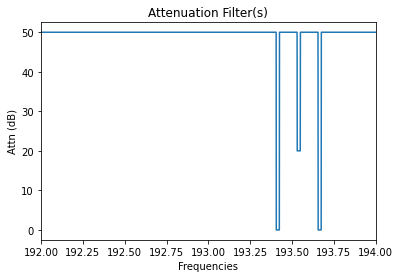

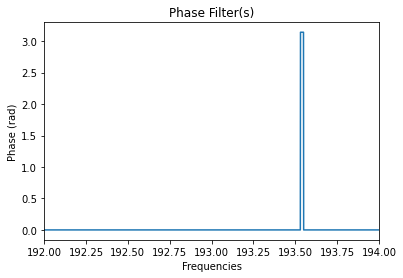

In [222]:
# Parameters 
Port_num = 1        #For Models with more than one output port 
c = 299792458
w0 = [1548, 1549,1550]       # in nm
BW_filter = 0.15   # in nm
Attenuation = [0,20,0]   # in dB 

phase = 3.141

Phase_rad = [0,phase,0]    # in rad
#Dispersion = [0,0,0]    # in ps/nm/km

filter_name = 'Group 2/exp4-Phase_rad-20db-mid-bw-0.15-phase1p6.wsp'

f0 = np.zeros(len(w0)) # Create an array with the number of filters to be created
# To frequency
for x in range(len(w0)):
    print (w0[x])
    f0[x] = (c/(w0[x]*1E-9))/1E12       #in THz
    
BW_f = (c*(BW_filter*1E-9)/((w0[0]*1E-9)**2)/1E12)    #in THz, we assume all filters have the same BW

# Create the WSP vector data 
Freq = np.arange(187.275,196.275,0.001) # check in page 83 of the manual the frequencies range
Attn = np.full(np.size(Freq),50) 
Phase = np.zeros(np.size(Freq))
Port = np.ones(np.size(Freq))*Port_num
#Dispersion = np.array(Dispersion)
# Create the filter with desired parameters 
Dlambda = np.zeros(len(w0))
for x in range(len(w0)):
    start = int(np.around((f0[x]-BW_f/2-187.2750)*1000)+1)   #Indexing the start & stop frequencies, C+L Band freqs 
    stop = int(np.around((f0[x]+BW_f/2-187.2750)*1000)+1)
    # For Attenuation 
    Attn[start:stop] = Attenuation[x] 
    # For Phase 
    #beta2 = -Dispersion[x]*w0[x]**2/(2*np.pi*c*1E-3)
    Delays = 0
    #Phase[start:stop] = -beta2/2*(2*np.pi*(Freq[start:stop]-f0[x]))**2
    Phase[start:stop] = Phase_rad[x]
    

#Create the WSP file 

WSPfile = open(filter_name,'w')
for x in range (np.size(Freq)):
    WSPfile.write("%0.3f\t%0.3f\t%0.3f\t%0.3f\n" %(Freq[x],Attn[x],Phase[x],Port[x]))
WSPfile.close()

# Read the profile from WSP file
WSPfile = open(filter_name,'r')
profiletext = WSPfile.read()
WSPfile.close()

# Plotting the filter created 

data_wsp = np.loadtxt(filter_name)
plt.figure()
plt.plot(data_wsp[:,0],data_wsp[:,1])
plt.xlim([192,194])
plt.xlabel('Frequencies')
plt.ylabel('Attn (dB)')
plt.title('Attenuation Filter(s)')

plt.figure()
plt.plot(data_wsp[:,0],data_wsp[:,2])
plt.xlim([192,194])

plt.xlabel('Frequencies')
plt.ylabel('Phase (rad)')
plt.title('Phase Filter(s)')

# Create the waveshaper instance 
rc = ws_create_waveshaper("ws1","SN067742.wsconfig")
print ("ws_create_waveshaper rc= ",ws_get_result_description(rc))

time.sleep(1)
# Read the WSP file and load it to the Waveshaper
#The Output should state 'Success', otherwise there is no communication with the WS
rc = ws_load_profile("ws1",profiletext)
if rc== b'success':
    print ("ws_create_waveshaper rc= ",ws_get_result_description(rc))
else:
    rc = ws_load_profile("ws1",profiletext)
        

time.sleep(1)

#delete the waveshaper instance
rc = ws_delete_waveshaper("ws1")
print ("ws_delete_waveshaper rc=",ws_get_result_description(rc))



## Measurement 
myOSA.SingleSweep()
osa_trace = myOSA.get_trace()
savemat('Group 2/phase-sensitive-amp-phase-{}.mat'.format(str(phase)), {'wl':osa_trace[0],'power':osa_trace[1]})


(-30.0, 5.0)

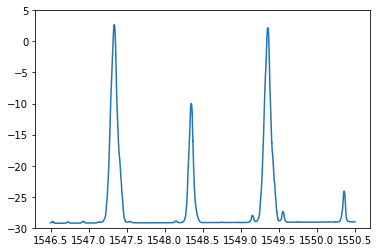

In [217]:
plt.plot(osa_trace[0], osa_trace[1]) 
plt.ylim(-30, 5)

(-30.0, 5.0)

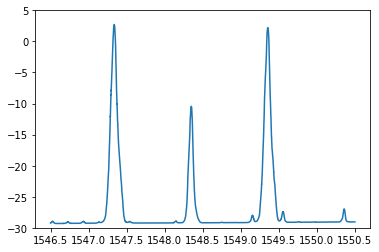

In [212]:
plt.plot(osa_trace[0], osa_trace[1]) 
plt.ylim(-30, 5)

(-30.0, 5.0)

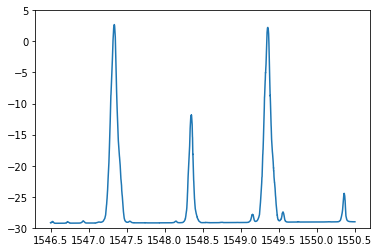

In [200]:
plt.plot(osa_trace[0], osa_trace[1]) 
plt.ylim(-30, 5)

(-30.0, 5.0)

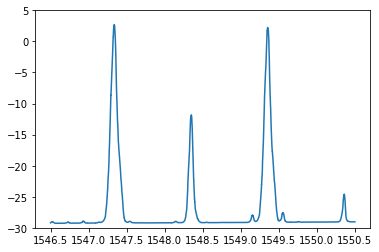

In [197]:
plt.plot(osa_trace[0], osa_trace[1]) 
plt.ylim(-30, 5)

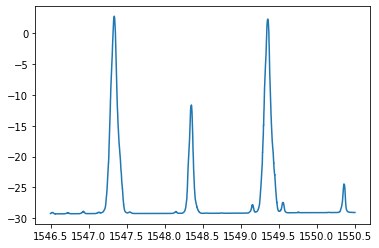

In [191]:
plt.plot(osa_trace[0], osa_trace[1]) 